In [3]:
#imports

import numpy as np
import pandas as pd
import requests
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [3]:
#set headers for reddit api
headers= {'User-agent' : 'Bender'}


In [96]:
#pull in road cycling posts 
road_posts = []
after = None
url = 'https://www.reddit.com/r/Velo/new/.json'
for i in range(40):
    print(i)
    if after == None:
        params = {}
    else:
        params = {'after' : after}
    res = requests.get(url, params=params, headers=headers)
    if res.status_code == 200:
        the_json = res.json()
        road_posts.extend(the_json['data']['children'])
        after = the_json['data']['after']
    else:
        print(res.status_code)
        break
    time.sleep(3)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [10]:
#view road cycling posts
road_posts

[{'kind': 't3',
  'data': {'approved_at_utc': None,
   'subreddit': 'roadcycling',
   'selftext': "I'm not a cycler, but I've thought about getting into it as an addition to running. Someone is selling a Fuji A2 sl bike that's been ridden twice for $100. Should I get it? Is it a good starter bike? I won't be doing anything crazy. When I looked it up, it seems that those bikes for for $400+, but I really know nothing about bikes. Help!",
   'author_fullname': 't2_36sn8w6l',
   'saved': False,
   'mod_reason_title': None,
   'gilded': 0,
   'clicked': False,
   'title': 'New to biking, help!',
   'link_flair_richtext': [],
   'subreddit_name_prefixed': 'r/roadcycling',
   'hidden': False,
   'pwls': None,
   'link_flair_css_class': None,
   'downs': 0,
   'thumbnail_height': None,
   'hide_score': False,
   'name': 't3_cbgi8n',
   'quarantine': False,
   'link_flair_text_color': 'dark',
   'author_flair_background_color': None,
   'subreddit_type': 'public',
   'ups': 1,
   'total_awards

In [97]:
#from Adi lesson cart
#remove extra text leaving title and body of post
road_text = [' '.join([post['data']['title'], post['data']['selftext']]) for post in road_posts]

In [23]:
mtb_posts = []
after = None
url = 'https://www.reddit.com/r/MTB/.json'
for i in range(40):
    print(i)
    if after == None:
        params = {}
    else:
        params = {'after' : after}
    res = requests.get(url, params=params, headers=headers)
    if res.status_code == 200:
        the_json = res.json()
        mtb_posts.extend(the_json['data']['children'])
        after = the_json['data']['after']
    else:
        print(res.status_code)
        break
    time.sleep(3)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [24]:
#from Adi lesson cart
#remove extra text leaving title and body of post
mtb_text = [' '.join([post['data']['title'], post['data']['selftext']]) for post in mtb_posts]

In [98]:
#from Adi lesson cart
#convert to a data frame for road cycling
road_df = pd.DataFrame(road_text, columns=['text'])
#add column of 1s to road cycling
road_df['roadie'] = 1

In [99]:
#view data frame
road_df.head()

text  roadie
0  Raced my first ever P123 Criterium at the Exet...       1
1  Jean-Paul Ballard: "The Aerodynamic Revolution...       1
2  Why is amateur doping so pervasive? [Another a...       1
3  Free Tacx Anteres in London Well I just finish...       1
4  What should my goal weight be? So I started at...       1

In [75]:
#Create a Mountain Bike data frame
mtb_df = pd.DataFrame(mtb_text, columns=['text'])
#add column for 0s 
mtb_df['roadie'] = 0

In [76]:
#view data frame
mtb_df.head()

text  roadie
0  Weekly New Rider Thread for July 10, 2019 Need...       0
1  Weekly New Bike/New Gear Thread! Show us your ...       0
2  In my quest for better grip I ordered new peda...       0
3  Here's a Pump Track project I'm working on and...       0
4  Been Riding For A Couple Weeks, Decided to Sen...       0

In [100]:
#from Adi lesson cart
#combine road and mountain bike data frames
bike = pd.concat([road_df, mtb_df], ignore_index =True)

In [101]:
#view data frame
bike.head()

text  roadie
0  Raced my first ever P123 Criterium at the Exet...       1
1  Jean-Paul Ballard: "The Aerodynamic Revolution...       1
2  Why is amateur doping so pervasive? [Another a...       1
3  Free Tacx Anteres in London Well I just finish...       1
4  What should my goal weight be? So I started at...       1

In [1]:
#write to csv
bike.to_csv('./bike.csv')

NameError: name 'bike' is not defined

In [4]:
#read csv back in 
bike = pd.read_csv('./bike.csv', index_col = False)

In [5]:
#drop index column
bike.drop(columns = 'Unnamed: 0', inplace= True)


In [6]:
#clean up data text 
import re
#remove links
bike['text'] = bike.text.map(lambda x: re.sub('http[s]?:\/\/[^\s]*', ' ', x))
#remove keep letters on only
bike['text'] = bike.text.map(lambda x: re.sub('[^a-zA-Z]', ' ', x))
#make all text lowercase
bike['text'] = bike.text.map(lambda x: x.lower())


In [7]:
#test cell
bike['text'][3]

'free tacx anteres in london well i just finished a longish term gig in london and had bought these rollers to use in london  i have a nice set at home and live in la where i can ride outside all the time anyway     the end result is i m giving my anteres away to anyone that wants them in london  the caveat is that i will only be there thursday afternoon and friday morning and you would need to come get them in soho  right off wardour street  pm me or post here if you are interested and we can figure out a time   i hope someone can use them  i also have some co  carriages and chain cleaner i can t take on the plane so you can have those too '

In [8]:
#shape without droping cells
bike.shape

(1983, 2)

In [9]:
#remove duplicates
bike.drop_duplicates(inplace = True)

In [10]:
#see shape with duplicates gone.
bike.shape

(1802, 2)

In [11]:
#null mean
bike['roadie'].value_counts(normalize = True)

1    0.519423
0    0.480577
Name: roadie, dtype: float64

In [12]:
#set X and y varibles
X = bike.drop('roadie', 1)
y = bike['roadie']

In [13]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [26]:
#From sklearn documentation
#make lemmatizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        def __call__(self, doc):
            return [self.wnl.lemmatize(t) for t in word_tokenize(doc)
                    



In [36]:
#from Adi cart lesson
#instantiate vectorizer test paramerter
tvec = TfidfVectorizer(stop_words='english' , tokenizer= LemmaTokenizer(), max_df=.95, min_df=5)

In [37]:
#from Adi cart lesson
#for training data
#fit tvec
tvec_train = tvec.fit_transform(X_train['text'])
#make matrix
train_bike = pd.SparseDataFrame(tvec_train, columns = tvec.get_feature_names())
#fill matrix
train_bike.fillna(0, inplace = True)
#drop words that are related to the title of the catagories
train_bike.drop(columns = ['road','mtb','mountain'], inplace = True)
#view data frame
train_bike.head()

/Users/russell/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


ability      able  absolutely  access  according  accurate  ace  active  \
0      0.0  0.000000         0.0     0.0        0.0       0.0  0.0     0.0   
1      0.0  0.072242         0.0     0.0        0.0       0.0  0.0     0.0   
2      0.0  0.000000         0.0     0.0        0.0       0.0  0.0     0.0   
3      0.0  0.000000         0.0     0.0        0.0       0.0  0.0     0.0   
4      0.0  0.000000         0.0     0.0        0.0       0.0  0.0     0.0   

   activity  actual  ...  yesterday  yeti  young  youtube   yt    z  zealand  \
0       0.0     0.0  ...        0.0   0.0    0.0      0.0  0.0  0.0      0.0   
1       0.0     0.0  ...        0.0   0.0    0.0      0.0  0.0  0.0      0.0   
2       0.0     0.0  ...        0.0   0.0    0.0      0.0  0.0  0.0      0.0   
3       0.0     0.0  ...        0.0   0.0    0.0      0.0  0.0  0.0      0.0   
4       0.0     0.0  ...        0.0   0.0    0.0      0.0  0.0  0.0      0.0   

   zero  zone     zwift  
0   0.0   0.0  0.000000  
1   0.0   0.0  0.000000  
2   0.0   0.0  0.000000  
3   0.0   0.0  0.000000  
4   0.0   0.0  0.109979  

[5 rows x 1702 columns]

In [38]:
#from Adi cart lesson
#for training data
#fit tvec
tvec_test = tvec.transform(X_test['text'])
#make matrix
test_bike = pd.SparseDataFrame(tvec_test, columns = tvec.get_feature_names())
#fill in matrix
test_bike.fillna(0, inplace = True)
#drop words that are related to the title of the catagories
test_bike.drop(columns = ['road','mtb', 'mountain'], inplace = True)
#view data frame
test_bike.head()

ability  able  absolutely  access  according  accurate  ace  active  \
0      0.0   0.0         0.0     0.0        0.0       0.0  0.0     0.0   
1      0.0   0.0         0.0     0.0        0.0       0.0  0.0     0.0   
2      0.0   0.0         0.0     0.0        0.0       0.0  0.0     0.0   
3      0.0   0.0         0.0     0.0        0.0       0.0  0.0     0.0   
4      0.0   0.0         0.0     0.0        0.0       0.0  0.0     0.0   

   activity  actual  ...  yesterday  yeti  young  youtube   yt    z  zealand  \
0       0.0     0.0  ...        0.0   0.0    0.0      0.0  0.0  0.0      0.0   
1       0.0     0.0  ...        0.0   0.0    0.0      0.0  0.0  0.0      0.0   
2       0.0     0.0  ...        0.0   0.0    0.0      0.0  0.0  0.0      0.0   
3       0.0     0.0  ...        0.0   0.0    0.0      0.0  0.0  0.0      0.0   
4       0.0     0.0  ...        0.0   0.0    0.0      0.0  0.0  0.0      0.0   

   zero  zone  zwift  
0   0.0   0.0    0.0  
1   0.0   0.0    0.0  
2   0.0   0.0    0.0  
3   0.0   0.0    0.0  
4   0.0   0.0    0.0  

[5 rows x 1702 columns]

In [111]:
#Random Forest model
params = {'min_samples_split':[12, 25, 40],
         'max_depth':[1,2,3],
         'n_estimators':[100,150,200],
         }
rf = RandomForestClassifier(n_jobs =2)
gs = GridSearchCV(rf, param_grid=params, return_train_score=True, cv=3)
gs.fit(train_bike, y_train)
gs.score(train_bike, y_train)

0.8756476683937824

In [112]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 12, 'n_estimators': 150}

In [113]:
test_bike.shape

(451, 1786)

In [114]:
train_bike.shape

(1351, 1786)

In [115]:
gs.score(test_bike, y_test)

0.8580931263858093

In [145]:
gs.best_estimator_.feature_importances_

array([0.00000000e+00, 4.44080557e-06, 0.00000000e+00, ...,
       1.81129355e-03, 0.00000000e+00, 0.00000000e+00])

In [146]:
#from Adi cart lesson
#list of features by weight
feat_importance = pd.DataFrame(gs.best_estimator_.feature_importances_, train_bike.columns, columns=['importance'])

feat_importance.sort_values(by='importance', ascending=False).head(30)

importance
race          0.047698
trails        0.045619
training      0.043187
cat           0.027776
power         0.026386
trail         0.026002
races         0.025665
bike          0.023833
ftp           0.023125
rides         0.022545
racing        0.022460
crit          0.022252
cycling       0.021863
crits         0.020535
data          0.019934
intervals     0.019441
fork          0.018559
group         0.017235
doing         0.016691
heart         0.015398
biking        0.012201
enduro        0.011919
meter         0.010451
suspension    0.010288
park          0.010246
rear          0.009637
criterium     0.009481
season        0.009303
trainer       0.008734
air           0.008637

In [39]:
#Logistic Regression model
lr =LogisticRegression()
lr_params = {
 #running hyperparameters other than the defualt improved the train but made the test worse
  #  'C': [0.5,0.7],
 #  'penalty': ['l1', 'l2', 'elasticnet'],
}

gs_lr = GridSearchCV(lr, param_grid=lr_params)
gs_lr.fit(train_bike, y_train)
print(gs_lr.best_score_)
gs_lr.best_params_

/Users/russell/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/russell/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/russell/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/russell/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8985936343449297


/Users/russell/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{}

In [40]:
gs_lr.score(test_bike, y_test)

0.8891352549889135

In [41]:
#set up feature coeff for a data frame
data = np.transpose(np.exp(gs_lr.best_estimator_.coef_))
data.shape

(1702, 1)

In [42]:
#make data frame
lr_coef = pd.DataFrame(data[:,:])
lr_coef.head()

0
0  1.005615
1  1.220607
2  0.738679
3  0.777858
4  0.906378

In [43]:
#features with coeff for 0
lr_coef_df = pd.DataFrame(data, train_bike.columns, columns=['importance'])

lr_coef_df.sort_values(by='importance', ascending=False).tail(15)

importance
downhill      0.349590
need          0.348755
rear          0.338476
dh            0.316874
suspension    0.299503
biking        0.281841
video         0.280534
dropper       0.274075
riding        0.251382
enduro        0.206497
jump          0.201741
fork          0.195974
park          0.180962
bike          0.073463
trail         0.022534

In [44]:
#features with coeff for 1
lr_coef_df = pd.DataFrame(data, train_bike.columns, columns=['importance'])

lr_coef_df.sort_values(by='importance', ascending=False).head(15)

importance
race        42.413992
training    26.062797
racing      24.209183
cycling     15.179064
power        9.901092
criterium    7.111907
crit         6.848805
trainer      4.772693
group        4.195580
hour         3.916357
crits        3.765373
sprint       3.713774
carbon       3.601449
cat          3.575342
ftp          3.552102

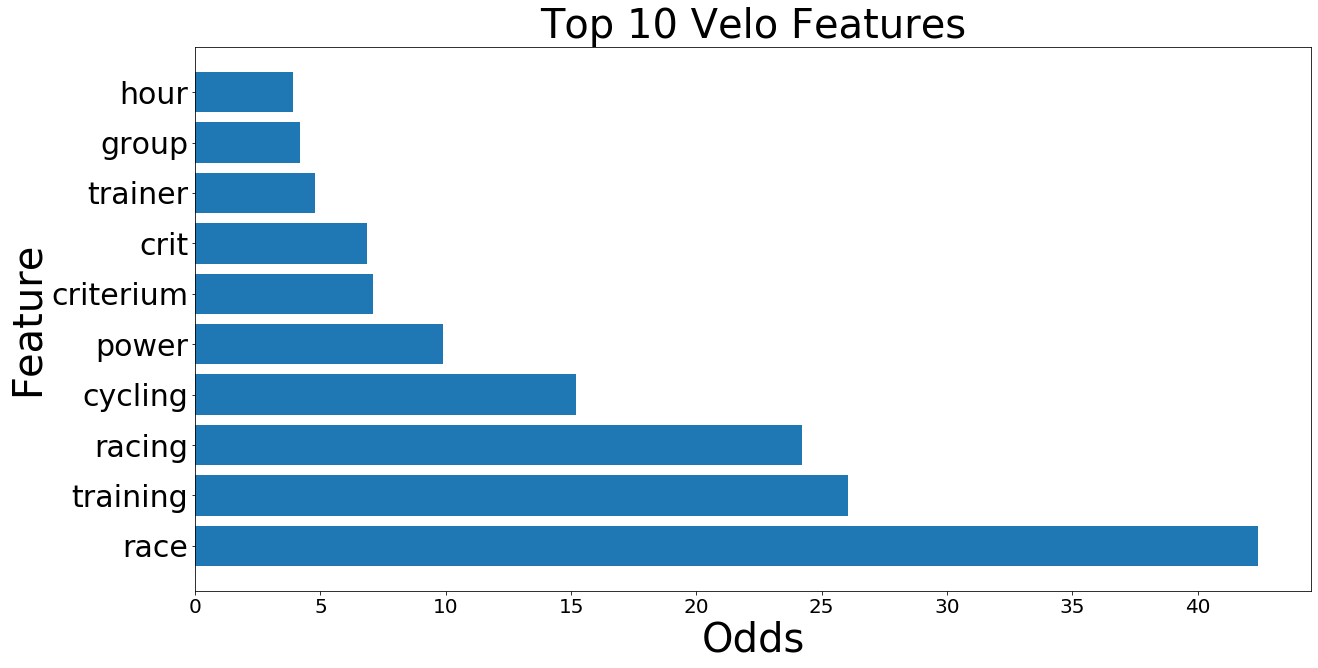

In [45]:
#from Adi cart lesson
#figure for positive class
plt.figure(figsize=(20,10))
temp = lr_coef_df.sort_values('importance', ascending=False).head(10)
plt.barh(temp.index, temp['importance'])
plt.title('Top 10 Velo Features', fontsize=40)
plt.xlabel('Odds', fontsize=40)
plt.ylabel('Feature', fontsize=40);
plt.xticks(fontsize =20)
plt.yticks(fontsize =30);


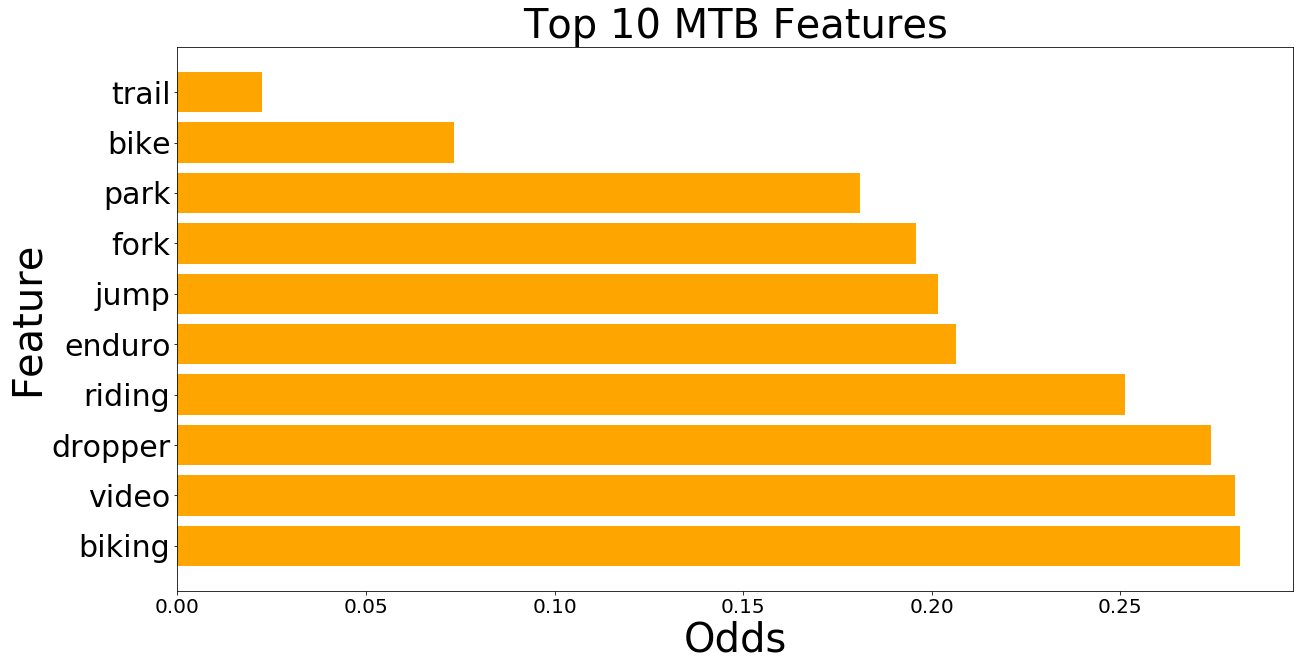

In [46]:
#from Adi cart lesson
#figure for negative class
plt.figure(figsize=(20,10))
temp = lr_coef_df.sort_values('importance', ascending=False).tail(10)
plt.barh(temp.index, temp['importance'] , color = 'orange')
plt.title('Top 10 MTB Features', fontsize=40)
plt.xlabel('Odds', fontsize=40)
plt.ylabel('Feature', fontsize=40);
plt.xticks(fontsize =20)
plt.yticks(fontsize =30);


In [29]:
#cofusion metrix
y_pred = gs_lr.predict(test_bike)
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, columns =['Pred MTB', 'Pred Velo'], index = ['Actual MTB', 'Actual Velo'])

Pred MTB  Pred Velo
Actual MTB        190         27
Actual Velo        24        210

In [123]:
#naive bayes model
mnb = MultinomialNB()
mnb_params = {
   # 'cvec__max_features': [100, 500],
   # 'cvec__ngram_range' : [(1,1), (1,2)],
   # 'cvec__stop_words':['english', None]
}

gs_mnb = GridSearchCV(mnb, param_grid=mnb_params)
gs_mnb.fit(train_bike, y_train)
print(gs_mnb.best_score_)
#gs_mnb = mnb.best_params_

/Users/russell/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8882309400444115


In [124]:
gs_mnb.score(test_bike, y_test)

0.8802660753880266

In [132]:
gs_mnb.best_estimator_.feature_count_

array([[0.77286702, 3.03779235, 1.77117466, ..., 0.70311501, 0.1823682 ,
        0.        ],
       [0.4875677 , 4.08218282, 0.65652323, ..., 4.32316553, 1.43785697,
        1.84351677]])

In [200]:
#feature coeff
mnb_feat = pd.DataFrame(np.transpose(gs_mnb.best_estimator_.coef_), train_bike.columns, columns=['importance'])

mnb_feat.sort_values(by='importance', ascending=False).head(15)


importance
race        -4.982607
training    -5.188896
racing      -5.327705
power       -5.429753
bike        -5.452102
amp         -5.493490
cycling     -5.571734
just        -5.575326
ride        -5.667994
new         -5.707035
time        -5.724381
like        -5.736696
ve          -5.807953
rides       -5.848722
criterium   -5.860639

In [157]:
#feature coeff
mnb_feat.sort_values(by='importance', ascending=False).tail(15)

importance
suntour       -8.462344
singletrack   -8.462344
commencal     -8.462344
pinkbike      -8.462344
hardtail      -8.462344
tail          -8.462344
diamondback   -8.462344
diamond       -8.462344
dh            -8.462344
hitch         -8.462344
talon         -8.462344
passed        -8.462344
slx           -8.462344
ht            -8.462344
nail          -8.462344